In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Mostramos cómo quedo el dataset con el análisis exploratorio previamente realizado en la notebook 1.

In [443]:
ds_hotel=pd.read_csv('./hotels_train_filtrado.csv')
ds_trabajo = ds_hotel.copy()
ds_trabajo.head(20)

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,...,total_of_special_requests,reservation_status_date,is_canceled,arrival_date,region,agent_specified,total_guests,more_than_zero_days_in_waiting_list,season,room_type_match
0,City Hotel,1.633333,1,2,Online TA,TA/TO,0,0,0,D,...,1,2016-08-25,1,2016-09-05,Americas,1,1,0,Summer,True
1,Resort Hotel,0.133333,0,1,Groups,Direct,0,0,0,A,...,0,2015-11-01,0,2015-10-31,Europe,0,2,0,Autumn,True
2,City Hotel,0.833333,0,1,Online TA,TA/TO,0,0,0,F,...,2,2016-10-14,0,2016-10-13,Europe,1,4,0,Autumn,True
3,City Hotel,0.866667,2,5,Groups,TA/TO,0,0,0,A,...,0,2016-11-29,1,2016-12-12,Europe,1,2,0,Autumn,True
4,City Hotel,3.466667,2,5,Offline TA/TO,TA/TO,0,0,0,A,...,1,2017-03-26,0,2017-03-19,Europe,1,2,0,Winter,True
5,City Hotel,0.033333,3,5,Direct,Direct,0,0,0,A,...,0,2015-09-22,0,2015-09-14,Africa,0,1,0,Summer,True
6,Resort Hotel,3.733333,4,9,Offline TA/TO,TA/TO,0,0,0,D,...,1,2015-11-25,0,2015-11-12,Europe,1,2,0,Autumn,True
7,City Hotel,6.400000,2,1,Online TA,TA/TO,0,1,0,A,...,0,2015-07-03,1,2015-07-12,Europe,1,2,0,Summer,True
8,City Hotel,8.566667,2,2,Online TA,TA/TO,0,0,0,A,...,2,2017-06-08,0,2017-06-04,Europe,1,2,0,Spring,True
9,Resort Hotel,0.133333,0,1,Online TA,TA/TO,0,0,0,A,...,2,2016-12-11,0,2016-12-10,Europe,1,2,0,Autumn,False


Como estamos hablando de reservaciones en hoteles, es válido tomar en cuenta las reservaciones por temporadas. De tal forma se genera una nueva variable que se le asignará una temporada correspondiente a cada dato según su fecha de llegada (LAS TEMPORADAS SON REPRESENTATIVAS)

In [444]:
ds_trabajo['arrival_date'] = pd.to_datetime(ds_trabajo['arrival_date'])

# Crear una nueva columna 'season' basada en los valores de la columna 'arrival_date'
ds_trabajo['season'] = pd.cut(ds_trabajo['arrival_date'].dt.month,
                              bins=[0,3,6,9,12],
                              labels=['Winter', 'Spring', 'Summer', 'Autumn'])
ds_trabajo.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,...,total_of_special_requests,reservation_status_date,is_canceled,arrival_date,region,agent_specified,total_guests,more_than_zero_days_in_waiting_list,season,room_type_match
0,City Hotel,1.633333,1,2,Online TA,TA/TO,0,0,0,D,...,1,2016-08-25,1,2016-09-05,Americas,1,1,0,Summer,True
1,Resort Hotel,0.133333,0,1,Groups,Direct,0,0,0,A,...,0,2015-11-01,0,2015-10-31,Europe,0,2,0,Autumn,True
2,City Hotel,0.833333,0,1,Online TA,TA/TO,0,0,0,F,...,2,2016-10-14,0,2016-10-13,Europe,1,4,0,Autumn,True
3,City Hotel,0.866667,2,5,Groups,TA/TO,0,0,0,A,...,0,2016-11-29,1,2016-12-12,Europe,1,2,0,Autumn,True
4,City Hotel,3.466667,2,5,Offline TA/TO,TA/TO,0,0,0,A,...,1,2017-03-26,0,2017-03-19,Europe,1,2,0,Winter,True


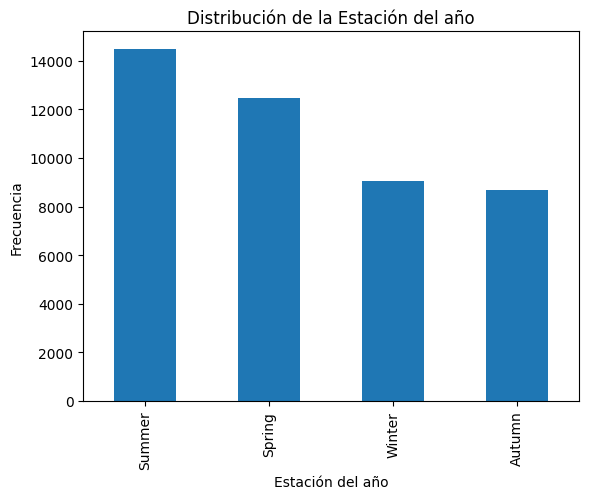

In [496]:
frecuencia = ds_trabajo['season'].value_counts()

plt.xlabel('Estación del año')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Estación del año')
frecuencia.plot(kind='bar')
plt.show()

Al agregar la variable `season` logramos ver que durante el verano es donde más reservas hay pero a su vez mas cancelaciones, mientras que en invierno y otoño disminuyen,
pero son menos las cancelaciones

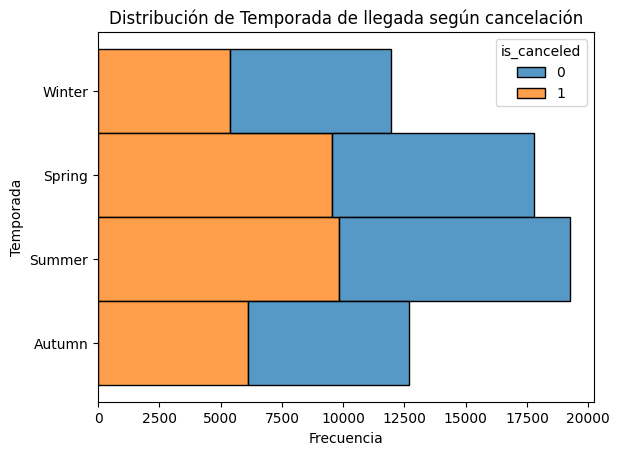

In [445]:
arrival_canceled = ds_trabajo[['season', 'is_canceled']]

arrival_canceled = arrival_canceled.groupby(['season', 'is_canceled']).size().reset_index(name='counts')
plt.xlabel('Frecuencia')
plt.ylabel('Temporada')
plt.title('Distribución de Temporada de llegada según cancelación')
sns.histplot(y='season', weights='counts', hue='is_canceled', multiple='stack', data=arrival_canceled, bins=35)
plt.show()

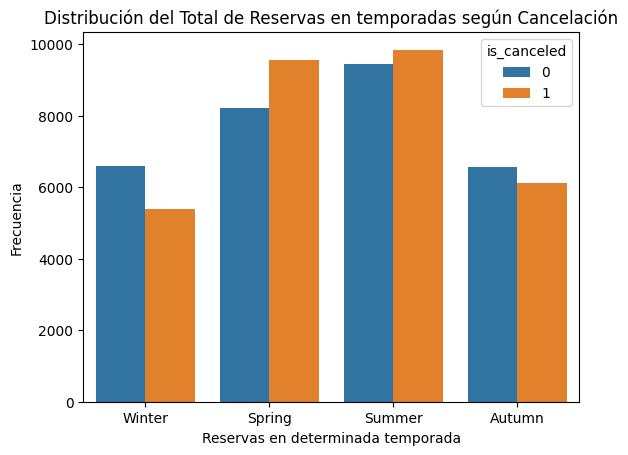

In [446]:
sns.countplot(x="season", hue="is_canceled", data=ds_trabajo)

plt.xlabel('Reservas en determinada temporada')
plt.ylabel('Frecuencia')
plt.title('Distribución del Total de Reservas en temporadas según Cancelación')

plt.show()

In [447]:
table = pd.pivot_table(ds_trabajo, values='is_canceled', index=['hotel', 'season'], columns=[], aggfunc=lambda x: x.sum()/len(x))
table

is_canceled
hotel        season             
City Hotel   Winter     0.511672
             Spring     0.583353
             Summer     0.540011
             Autumn     0.543595
Resort Hotel Winter     0.328621
             Spring     0.422941
             Summer     0.451187
             Autumn     0.353315

Vimos previamente que las variables `assigned_room_type` y `reserver_room_type` no tiene relacion directa con `is_canceled`, las reinterpretamos a ambas como "¿se le asignó el cuarto deseado?" y lo transformamos en una columna que puede darnos información

In [448]:
ds_trabajo['room_type_match'] = ds_trabajo['reserved_room_type'] == ds_trabajo['assigned_room_type']

De esta forma tengo una variable booleana que me indicará si se le asignó el cuarto deseado y qué relación tiene con is_canceled

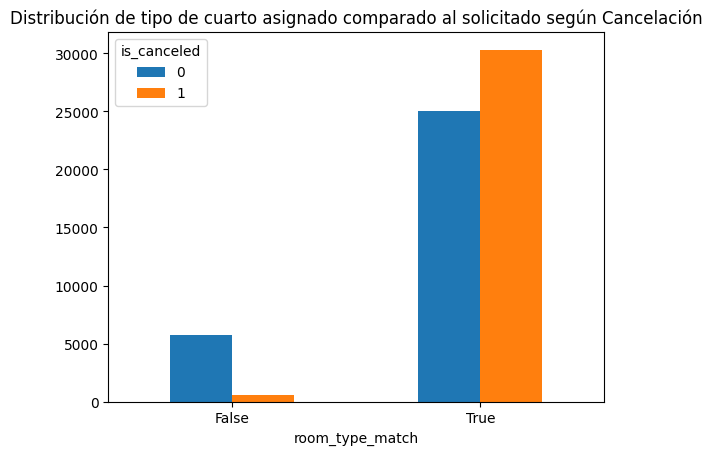

In [449]:
tabla_frecuencia = pd.crosstab(ds_trabajo['room_type_match'], ds_trabajo['is_canceled'])
tabla_frecuencia.plot.bar(rot=0)

plt.title("Distribución de tipo de cuarto asignado comparado al solicitado según Cancelación")
plt.show()

Podemos ver que aunque no se le asignó el cuarto deseado, el porcentaje de cancelación es mucho más bajo. Tal vez se deba a una mejoría en la asignación por el mismo costo, por ejemplo

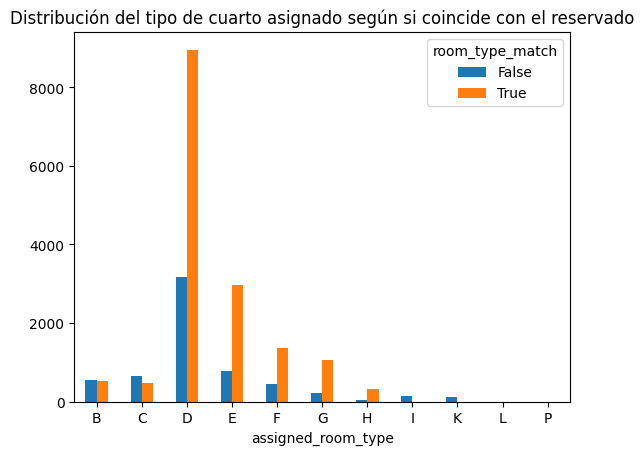

In [450]:
df = ds_trabajo.drop(ds_trabajo[ds_trabajo['assigned_room_type'] == 'A'].index) #SACO EL VALOR DE "A" PORQUE MOLESTA EN LA VISUALIZACION DEL GRAFICO
tabla_frecuencia = pd.crosstab(df['assigned_room_type'], df['room_type_match'])
tabla_frecuencia.plot.bar(rot=0)
plt.title("Distribución del tipo de cuarto asignado según si coincide con el reservado")
plt.show()

In [451]:
ds_trabajo.to_csv('hotels_train_filtrado.csv', index=False)

Nos fijamos si tenemos registos enteros duplicados en el dataset.

In [452]:
ds_trabajo.duplicated().sum()

17059

Tenemos 17059 duplicados. Como son registros totalmente duplicados, es decir, tienen todas sus columnas idénticas, vamos a eliminarlos ya que no proporcionan información adicional y podrían sesgar nuestro análisis

In [453]:
ds_trabajo = ds_trabajo.drop_duplicates()

In [454]:
ds_trabajo.shape

(44632, 25)

Para la detección de outliers en nuestro dataset, vamos a comenzar realizando un análisis univariado para cada una de sus columnas y decidiremos qué tratamiento darles a aquellos valores atípicos que encontremos.

In [455]:
ds_trabajo.columns.to_list()

['hotel',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'customer_type',
 'adr',
 'total_of_special_requests',
 'reservation_status_date',
 'is_canceled',
 'arrival_date',
 'region',
 'agent_specified',
 'total_guests',
 'more_than_zero_days_in_waiting_list',
 'season',
 'room_type_match']

En la notebook_1, analizamos las distribuciones de todas estas columnas y ya observamos que algunas de ellas no presentaban valores atípicos:
- `hotel` no presenta valores atípicos. Analizamos anteriormente su distribución mediante un gráfico de torta y observamos que sus dos categorías presentan porcentajes considerables (siendo estos 68% y 32%)
- `season` no presenta valores atípicos. Vimos en un barplot anteriormente que todas las categorías tienen frecuencias considerables
- `is_repeated_guest`, `is_canceled`, `agent_specified`, `more_than_zero_days_in_waiting_list`, `room_type_match` son booleanas y no presentan valores atípicos

En el caso de `lead_time`, habíamos analizado su distribución mediante un boxplot y presentaba outliers.

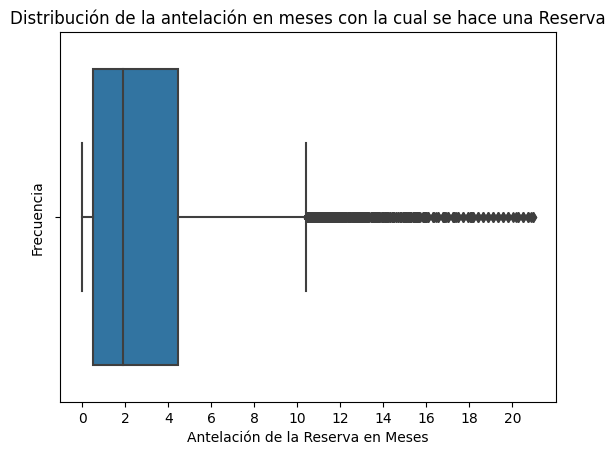

In [456]:
sns.boxplot(x=ds_trabajo["lead_time"])
plt.xticks(range(0, 22, 2))
plt.xlabel('Antelación de la Reserva en Meses')
plt.ylabel('Frecuencia')
plt.title('Distribución de la antelación en meses con la cual se hace una Reserva')
plt.show()

In [457]:
#Cuartiles
Q1_lead_time=np.quantile(ds_trabajo.lead_time,0.25)
Q3_lead_time=np.quantile(ds_trabajo.lead_time,0.75)

#Rango intercuartil
IQR_lead_time=Q3_lead_time-Q1_lead_time

#Limite inferior Outliers
out_inf=Q1_lead_time-1.5*IQR_lead_time
out_sup=Q3_lead_time+1.5*IQR_lead_time
print(out_inf)
print(out_sup)

-5.45
10.416666666666668


Vamos a ver cuántos valores están 1.5 veces por debajo y por encima del IQR para `lead_time`.

In [458]:
outliers_inf = df[df['lead_time'] < out_inf]
print("Outliers inferiores:",outliers_inf["lead_time"].count())
outliers_sup = ds_trabajo[ds_trabajo['lead_time'] > out_sup]
print("Outliers superiores:",outliers_sup["lead_time"].count())

Outliers inferiores: 0
Outliers superiores: 1163


No tenemos negativos en esta columna al tratarse de una cantidad de meses, (ya habíamos hecho este análisis), por lo tanto no tendremos outliers por este lado. En cuanto a los outliers superiores, es una cantidad reducida de registros. Sin embargo, creemos que el tiempo de antelación con el cual se realiza una reserva puede ser un factor importante para determinar una cancelación. Además, en la notebook_1 habíamos hecho un scatter plot de `lead_time` junto con `is_canceled` y notamos que a partir de los 10 meses se cancelaba con mayor frecuencia. Por lo tanto vamos a conservar estos outliers.

En cuanto a `stays_in_weekend_nights` vemos en un boxplot que tenemos algunos valores atípicos.

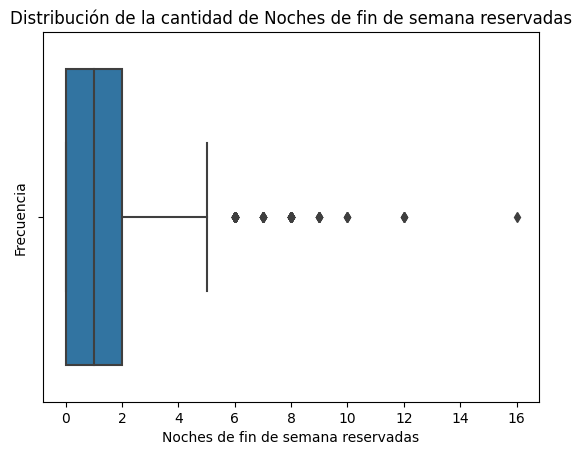

In [459]:
sns.boxplot(x=ds_trabajo["stays_in_weekend_nights"])
plt.xlabel('Noches de fin de semana reservadas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de Noches de fin de semana reservadas')
plt.show()

In [460]:
#Cuartiles
Q1_stays_in_weekend_nights=np.quantile(ds_trabajo.stays_in_weekend_nights,0.25)
Q3_stays_in_weekend_nights=np.quantile(ds_trabajo.stays_in_weekend_nights,0.75)

#Rango intercuartil
IQR_stays_in_weekend_nights=Q3_stays_in_weekend_nights-Q1_stays_in_weekend_nights

#Limite inferior Outliers
out_inf=Q1_stays_in_weekend_nights-1.5*IQR_stays_in_weekend_nights
out_sup=Q3_stays_in_weekend_nights+1.5*IQR_stays_in_weekend_nights
print(out_inf)
print(out_sup)

-3.0
5.0


Esta columna tampoco tiene outliers inferiores (es una cantidad), pero sí tiene algunos pocos superiores. Vamos a analizar la relación de aquellos registros con el target `is_canceled`.

In [461]:
outliers_inf = ds_trabajo[ds_trabajo['stays_in_weekend_nights'] < out_inf]
print("Outliers inferiores:", outliers_inf["stays_in_weekend_nights"].count())

outliers_sup = ds_trabajo[ds_trabajo['stays_in_weekend_nights'] > out_sup]
print("Outliers superiores:", outliers_sup["stays_in_weekend_nights"].count())

Outliers inferiores: 0
Outliers superiores: 118


Observamos que, si bien son pocos registros, cuando se reservan más de 5 noches de fin de semana hay una tendencia marcada a cancelar la reserva. Por este motivo, vamos a conservar estos outliers.

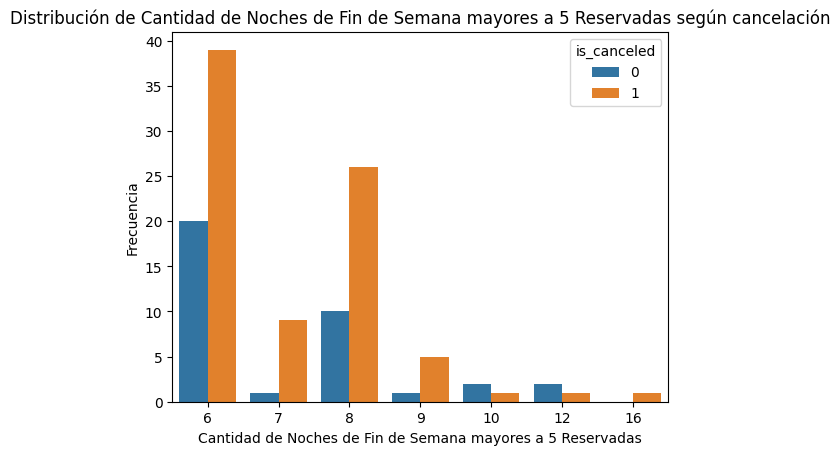

In [462]:
df = ds_trabajo.loc[ds_trabajo['stays_in_weekend_nights'] > 5]
grafico = sns.countplot(x=df['stays_in_weekend_nights'], hue='is_canceled', data=ds_trabajo)

plt.xlabel('Cantidad de Noches de Fin de Semana mayores a 5 Reservadas')
plt.ylabel('Frecuencia')
plt.title("Distribución de Cantidad de Noches de Fin de Semana mayores a 5 Reservadas según cancelación")

plt.show()

En cuanto a `stays_in_week_nights`, sucede algo similar a `stays_in_weekend_nights`. Tenemos algunos valores atípicos superiores.

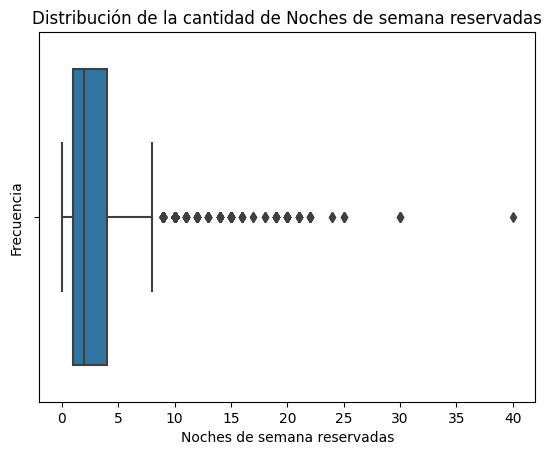

In [463]:
sns.boxplot(x=ds_trabajo["stays_in_week_nights"])
plt.xlabel('Noches de semana reservadas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de Noches de semana reservadas')
plt.show()

In [464]:
#Cuartiles
Q1_stays_in_week_nights=np.quantile(ds_trabajo.stays_in_week_nights,0.25)
Q3_stays_in_week_nights=np.quantile(ds_trabajo.stays_in_week_nights,0.75)

#Rango intercuartil
IQR_stays_in_week_nights=Q3_stays_in_week_nights-Q1_stays_in_week_nights

#Limite inferior Outliers
out_inf=Q1_stays_in_week_nights-1.5*IQR_stays_in_week_nights
out_sup=Q3_stays_in_week_nights+1.5*IQR_stays_in_week_nights
print(out_inf)
print(out_sup)

-3.5
8.5


In [465]:
outliers_inf = ds_trabajo[ds_trabajo['stays_in_week_nights'] < out_inf]
print("Outliers inferiores:", outliers_inf["stays_in_week_nights"].count())

outliers_sup = ds_trabajo[ds_trabajo['stays_in_week_nights'] > out_sup]
print("Outliers superiores:",outliers_sup["stays_in_week_nights"].count())

Outliers inferiores: 0
Outliers superiores: 779


Si bien son pocos outliers superiores, creemos que hay una variabilidad respecto al target `is_canceled` para estos registros. Por otro lado, creemos que podemos obtener información haciendo un análisis multivariado de `stays_in_week_nights`, `stays_in_weekend_nights` (ambas están correlacionadas) y el target `is_canceled`. TODO

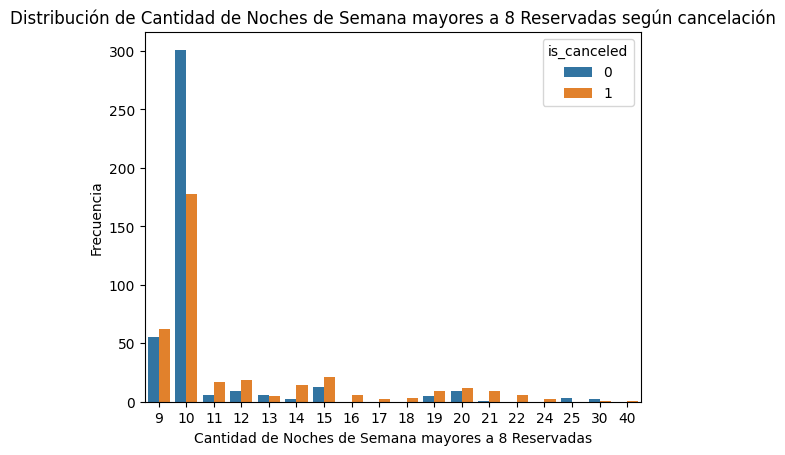

In [466]:
df = ds_trabajo.loc[ds_trabajo['stays_in_week_nights'] > 8]
grafico = sns.countplot(x=df['stays_in_week_nights'], hue='is_canceled', data=ds_trabajo)

plt.xlabel('Cantidad de Noches de Semana mayores a 8 Reservadas')
plt.ylabel('Frecuencia')
plt.title("Distribución de Cantidad de Noches de Semana mayores a 8 Reservadas según cancelación")

plt.show()

Para `previous_cancellations`, tenemos outliers superiores. En la notebook_1 habíamos analizado que la distribución de la variable respecto de `is_canceled` era muy variada, por lo tanto vamos a hacer un análisis más profundo de estos outliers para tomar una decisión.

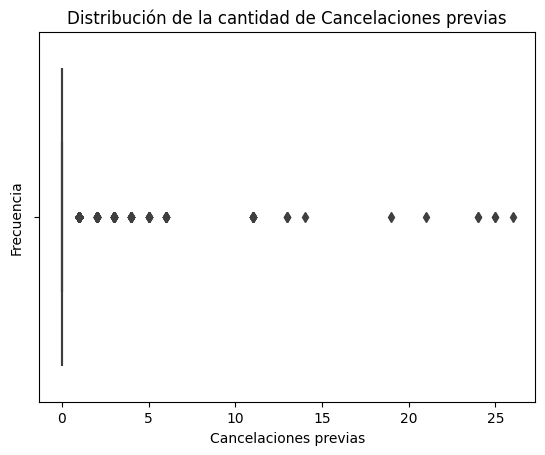

In [467]:
sns.boxplot(x=ds_trabajo["previous_cancellations"])
plt.xlabel('Cancelaciones previas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de Cancelaciones previas')
plt.show()

In [468]:
#Cuartiles
Q1_previous_cancellations=np.quantile(ds_trabajo.previous_cancellations,0.25)
Q3_previous_cancellations=np.quantile(ds_trabajo.previous_cancellations,0.75)

#Rango intercuartil
IQR_previous_cancellations=Q3_previous_cancellations-Q1_previous_cancellations

#Limite inferior Outliers
out_inf=Q1_previous_cancellations-1.5*IQR_previous_cancellations
out_sup=Q3_previous_cancellations+1.5*IQR_previous_cancellations
print(out_inf)
print(out_sup)

0.0
0.0


In [469]:
outliers_inf = ds_trabajo[ds_trabajo['previous_cancellations'] < out_inf]
print("Outliers inferiores:", outliers_inf["previous_cancellations"].count())

outliers_sup = ds_trabajo[ds_trabajo['previous_cancellations'] > out_sup]
print("Outliers superiores:",outliers_sup["previous_cancellations"].count())

Outliers inferiores: 0
Outliers superiores: 1138


Observamos esta variabilidad respecto de `is_canceled` separando las cantidades en dos barplots para mejorar la legibilidad. La cantidad de cancelaciones previas podría estar relacionada a la antelación con la cual se hace una reserva. Creemos que será útil hacer un análisis multivariado de `previous_cancellations`, `lead_time` y el target `is_canceled`. TODO

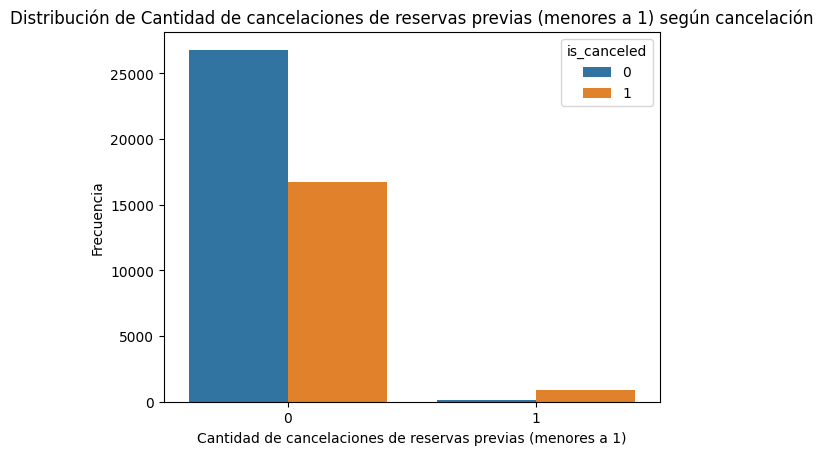

In [470]:
df = ds_trabajo.loc[ds_trabajo['previous_cancellations'] <= 1]
grafico = sns.countplot(x=df['previous_cancellations'], hue='is_canceled', data=ds_trabajo)

plt.xlabel('Cantidad de cancelaciones de reservas previas (menores a 1)')
plt.ylabel('Frecuencia')
plt.title("Distribución de Cantidad de cancelaciones de reservas previas (menores a 1) según cancelación")

plt.show()

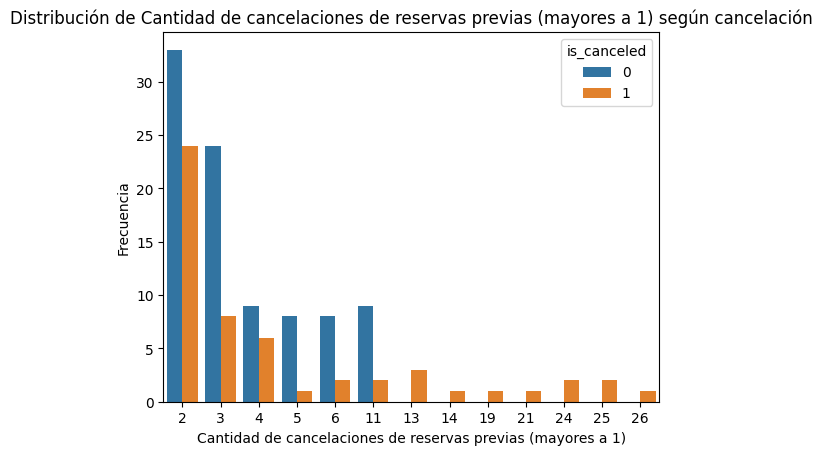

In [471]:
df = ds_trabajo.loc[ds_trabajo['previous_cancellations'] > 1]
grafico = sns.countplot(x=df['previous_cancellations'], hue='is_canceled', data=ds_trabajo)

plt.xlabel('Cantidad de cancelaciones de reservas previas (mayores a 1)')
plt.ylabel('Frecuencia')
plt.title("Distribución de Cantidad de cancelaciones de reservas previas (mayores a 1) según cancelación")

plt.show()

En cuanto a la variable `previous_bookings_not_canceled`, habíamos visto en la notebook_1 que tiene un comportamiento inverso a `previous_cancellations`: entre más reservas no canceladas, menor posibilidad de cancelación.

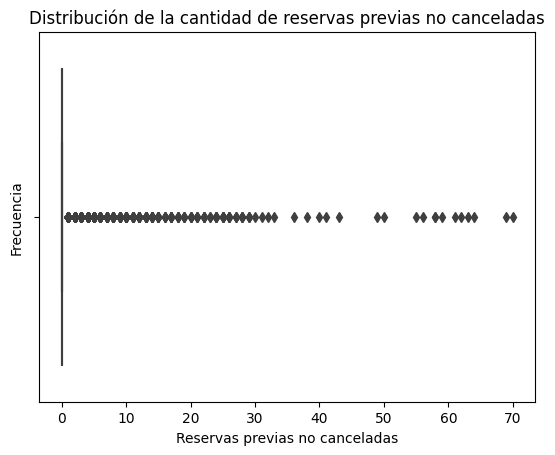

In [472]:
sns.boxplot(x=ds_trabajo["previous_bookings_not_canceled"])
plt.xlabel('Reservas previas no canceladas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de reservas previas no canceladas')
plt.show()

In [473]:
#Cuartiles
Q1_previous_bookings_not_canceled=np.quantile(ds_trabajo.previous_bookings_not_canceled,0.25)
Q3_previous_bookings_not_canceled=np.quantile(ds_trabajo.previous_bookings_not_canceled,0.75)

#Rango intercuartil
IQR_previous_bookings_not_canceled=Q3_previous_bookings_not_canceled-Q1_previous_bookings_not_canceled

#Limite inferior Outliers
out_inf=Q1_previous_bookings_not_canceled-1.5*IQR_previous_bookings_not_canceled
out_sup=Q3_previous_bookings_not_canceled+1.5*IQR_previous_bookings_not_canceled
print(out_inf)
print(out_sup)

0.0
0.0


In [474]:
outliers_inf = ds_trabajo[ds_trabajo['previous_bookings_not_canceled'] < out_inf]
print("Outliers inferiores:", outliers_inf["previous_bookings_not_canceled"].count())

outliers_sup = ds_trabajo[ds_trabajo['previous_bookings_not_canceled'] > out_sup]
print("Outliers superiores:",outliers_sup["previous_bookings_not_canceled"].count())

Outliers inferiores: 0
Outliers superiores: 1416


Hay pocos outliers. TODO: sumarla al analisis multivariado anterior.

Para `booking_changes`, observamos una cantidad más considerable de outliers superiores.

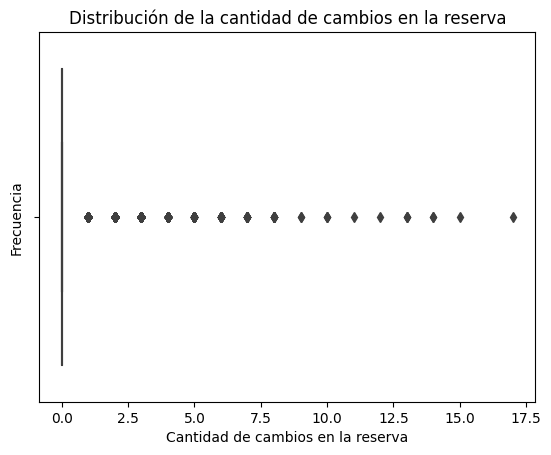

In [475]:
sns.boxplot(x=ds_trabajo["booking_changes"])
plt.xlabel('Cantidad de cambios en la reserva')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de cambios en la reserva')
plt.show()

In [476]:
#z-score modificado
mediana_booking_changes=np.median(ds_trabajo.booking_changes)
MAD=np.median(np.absolute(ds_trabajo.booking_changes-mediana_booking_changes))

ds_trabajo['zm_booking_changes']=(ds_trabajo.booking_changes - mediana_booking_changes)*0.6745/MAD

zm_booking_changes_inf = ds_trabajo[ds_trabajo['zm_booking_changes'] < 3.5]
print("Cantidad de registros con z-score menor a 3.5:", zm_booking_changes_inf["zm_booking_changes"].count())

zm_booking_changes_sup = ds_trabajo[ds_trabajo['zm_booking_changes'] > 3.5]
print("Cantidad de registros con z-score mayor a 3.5:", zm_booking_changes_sup["zm_booking_changes"].count())

Cantidad de registros con z-score menor a 3.5: 0
Cantidad de registros con z-score mayor a 3.5: 7480


Sin embargo, notamos que en todos los casos se cancela menos de lo que no. Creemos que esta columna podría no estar aportando información. Vamos a hacer un análisis multivariado. TODO

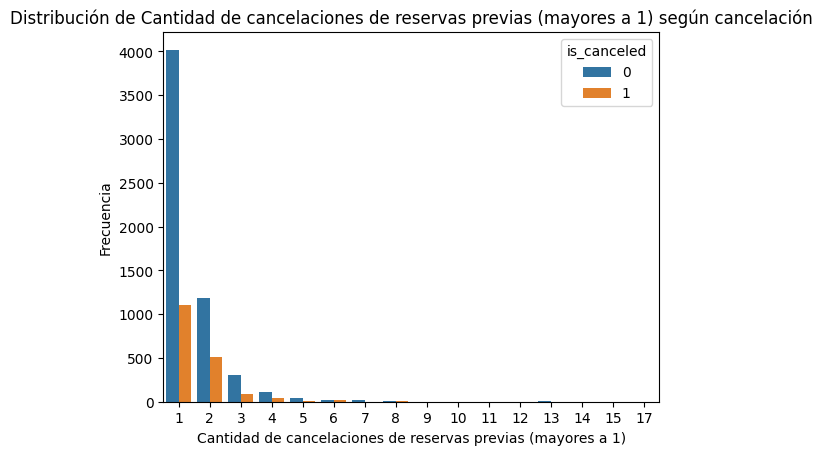

In [492]:
df = ds_trabajo.loc[ds_trabajo['booking_changes'] > 0]
grafico = sns.countplot(x=df['booking_changes'], hue='is_canceled', data=ds_trabajo)

plt.xlabel('Cantidad de cambios en la reserva')
plt.ylabel('Frecuencia')
plt.title("Distribución de Cantidad de cambios en la reserva según cancelación")

plt.show()

Para `adr`

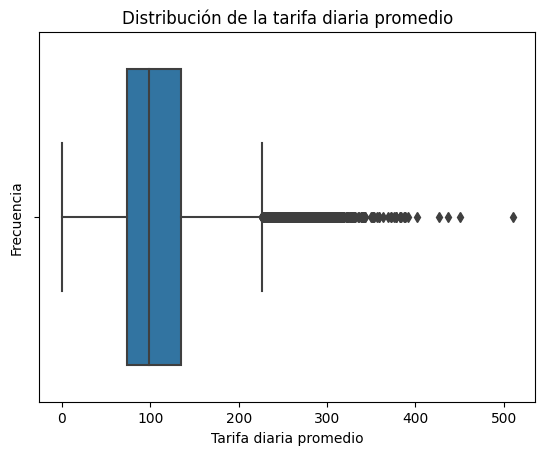

In [478]:
sns.boxplot(x=ds_trabajo["adr"])
plt.xlabel('Tarifa diaria promedio')
plt.ylabel('Frecuencia')
plt.title('Distribución de la tarifa diaria promedio')
plt.show()

In [479]:
#z-score modificado
mediana_adr=np.median(ds_trabajo.adr)
MAD=np.median(np.absolute(ds_trabajo.adr-mediana_adr))

ds_trabajo['zm_adr']=(ds_trabajo.adr - mediana_adr)*0.6745/MAD

zm_adr_inf = ds_trabajo[ds_trabajo['zm_adr'] < 3.5]
print("Cantidad de registros con z-score menor a 3.5:", zm_adr_inf["zm_adr"].count())

zm_adr = ds_trabajo[ds_trabajo['zm_adr'] > 3.5]
print("Cantidad de registros con z-score mayor a 3.5:", zm_adr["zm_adr"].count())

Cantidad de registros con z-score menor a 3.5: 44061
Cantidad de registros con z-score mayor a 3.5: 571


Para `total_of_special_requests`

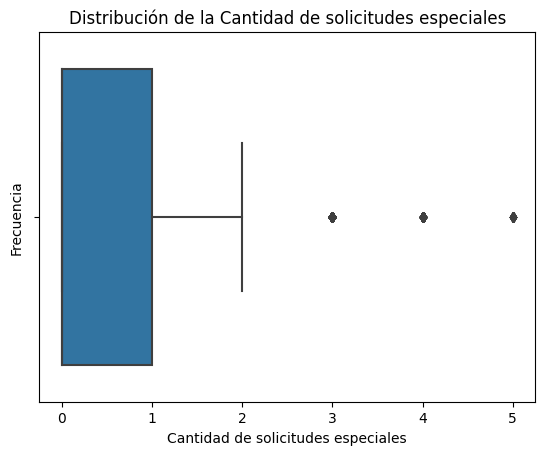

In [480]:
sns.boxplot(x=ds_trabajo["total_of_special_requests"])
plt.xlabel('Cantidad de solicitudes especiales')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de solicitudes especiales')
plt.show()

In [481]:
#z-score modificado
mediana_total_of_special_requests=np.median(ds_trabajo.total_of_special_requests)
MAD=np.median(np.absolute(ds_trabajo.total_of_special_requests-mediana_total_of_special_requests))

ds_trabajo['zm_total_of_special_requests']=(ds_trabajo.total_of_special_requests - mediana_total_of_special_requests)*0.6745/MAD

zm_total_of_special_requests_inf = ds_trabajo[ds_trabajo['zm_total_of_special_requests'] < 3.5]
print("Cantidad de registros con z-score menor a 3.5:", zm_total_of_special_requests_inf["zm_total_of_special_requests"].count())

zm_total_of_special_requests = ds_trabajo[ds_trabajo['zm_total_of_special_requests'] > 3.5]
print("Cantidad de registros con z-score mayor a 3.5:", zm_total_of_special_requests["zm_total_of_special_requests"].count())

Cantidad de registros con z-score menor a 3.5: 0
Cantidad de registros con z-score mayor a 3.5: 21309


Para `total_guests`

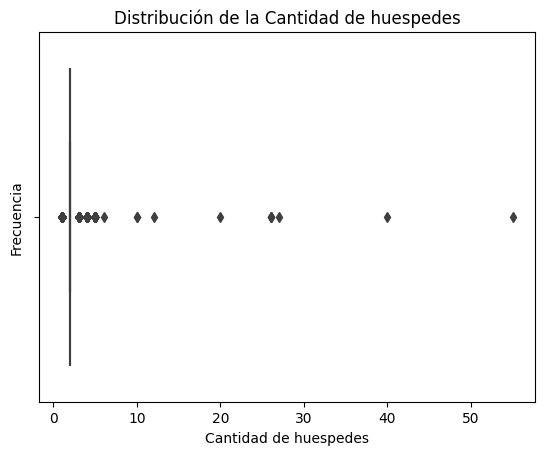

In [482]:
sns.boxplot(x=ds_trabajo["total_guests"])
plt.xlabel('Cantidad de huespedes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de huespedes')
plt.show()

In [483]:
#z-score modificado
mediana_total_guests=np.median(ds_trabajo.total_guests)
MAD=np.median(np.absolute(ds_trabajo.total_guests-mediana_total_guests))

ds_trabajo['zm_total_guests']=(ds_trabajo.total_guests - mediana_total_guests)*0.6745/MAD

zm_total_guests_inf = ds_trabajo[ds_trabajo['zm_total_guests'] < 3.5]
print("Cantidad de registros con z-score menor a 3.5:", zm_total_guests_inf["zm_total_guests"].count())

zm_total_guests = ds_trabajo[ds_trabajo['zm_total_guests'] > 3.5]
print("Cantidad de registros con z-score mayor a 3.5:", zm_total_guests["zm_total_guests"].count())

Cantidad de registros con z-score menor a 3.5: 7961
Cantidad de registros con z-score mayor a 3.5: 7239


Para `market_segment`

Online TA        27278
Offline TA/TO     6695
Direct            5439
Groups            2876
Corporate         1889
Complementary      346
Aviation           107
Undefined            2
Name: market_segment, dtype: int64


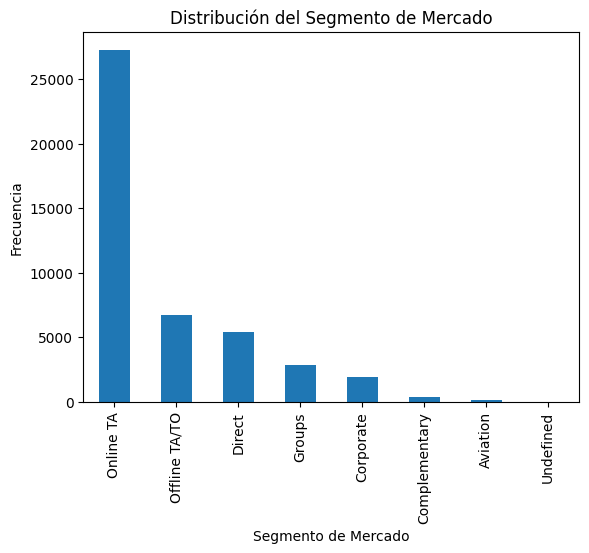

In [484]:
frecuencia = ds_trabajo['market_segment'].value_counts()
print(frecuencia)
plt.xlabel('Segmento de Mercado')
plt.ylabel('Frecuencia')
plt.title('Distribución del Segmento de Mercado')
frecuencia.plot(kind='bar')
plt.show()

Para `distribution_channel`

TA/TO        36222
Direct        6062
Corporate     2259
GDS             85
Undefined        4
Name: distribution_channel, dtype: int64


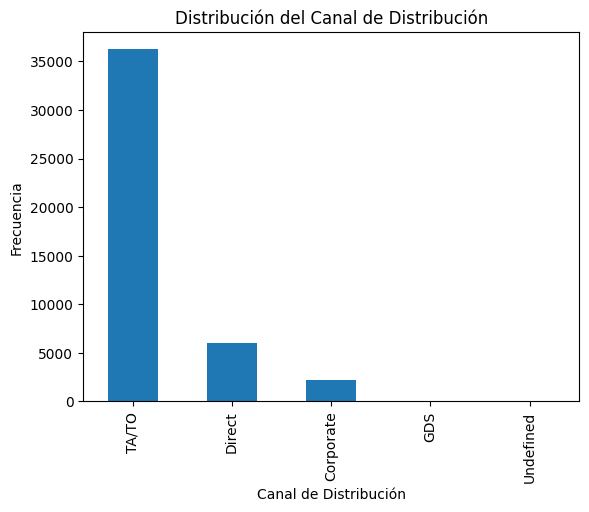

In [485]:
frecuencia = ds_trabajo['distribution_channel'].value_counts()
print(frecuencia)

plt.xlabel('Canal de Distribución')
plt.ylabel('Frecuencia')
plt.title('Distribución del Canal de Distribución')
frecuencia.plot(kind='bar')
plt.show()

Para `reserved_room_type`

A    28943
D     8831
E     3026
F     1429
G     1066
B      530
C      473
H      332
P        1
L        1
Name: reserved_room_type, dtype: int64


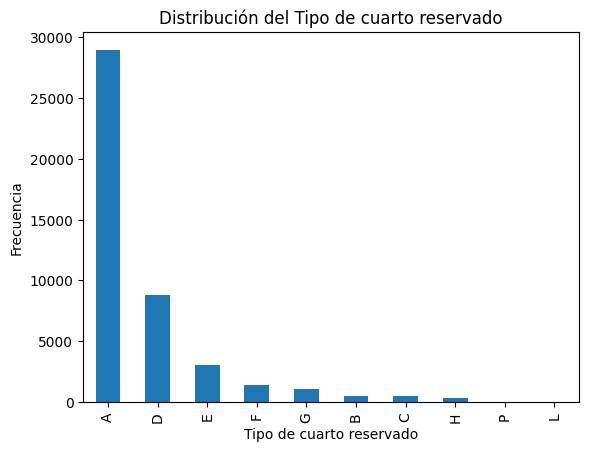

In [486]:
frecuencia = ds_trabajo['reserved_room_type'].value_counts()
print(frecuencia)

plt.xlabel('Tipo de cuarto reservado')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tipo de cuarto reservado')
frecuencia.plot(kind='bar')
plt.show()

Para `assigned_room_type`

A    24458
D    11051
E     3497
F     1777
G     1250
C     1039
B      919
H      380
I      142
K      117
P        1
L        1
Name: assigned_room_type, dtype: int64


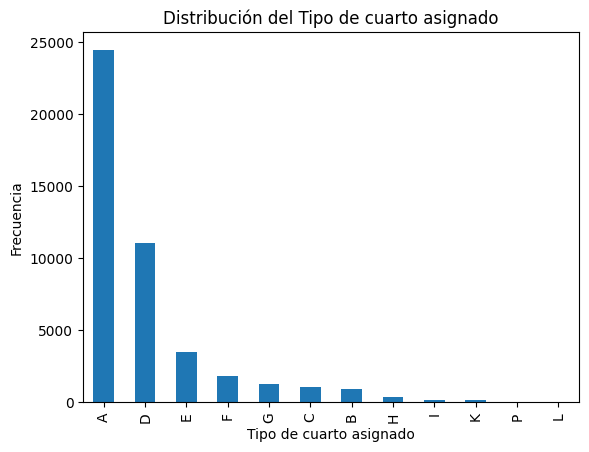

In [487]:
frecuencia = ds_trabajo['assigned_room_type'].value_counts()
print(frecuencia)

plt.xlabel('Tipo de cuarto asignado')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tipo de cuarto asignado')
frecuencia.plot(kind='bar')
plt.show()

Para `deposit_type`

No Deposit    43708
Non Refund      924
Name: deposit_type, dtype: int64


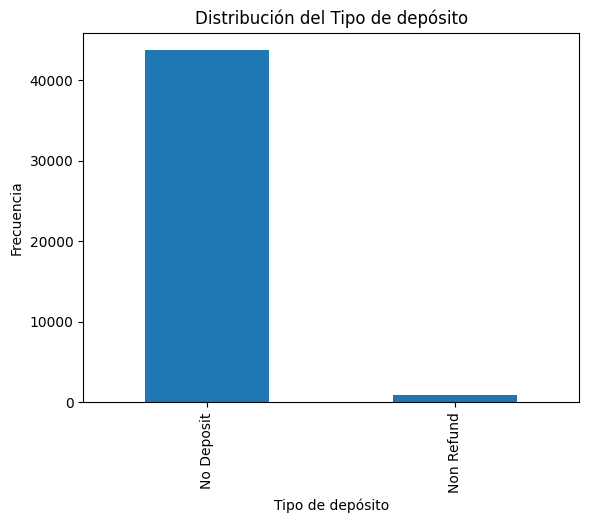

In [488]:
frecuencia = ds_trabajo['deposit_type'].value_counts()
print(frecuencia)

plt.xlabel('Tipo de depósito')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tipo de depósito')
frecuencia.plot(kind='bar')
plt.show()

Para `customer_type`

Transient          36797
Transient-Party     6110
Contract            1725
Name: customer_type, dtype: int64


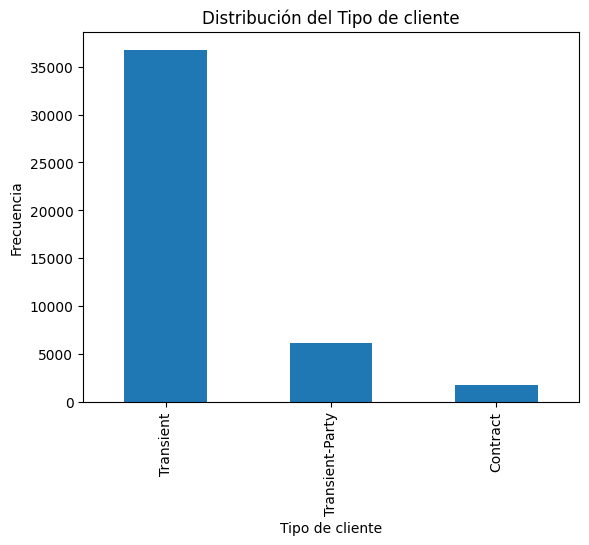

In [489]:
frecuencia = ds_trabajo['customer_type'].value_counts()
print(frecuencia)

plt.xlabel('Tipo de cliente')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tipo de cliente')
frecuencia.plot(kind='bar')
plt.show()